# Import modules

In [63]:
import simplejson as json
import time
import base64
import hashlib
import hmac
import requests
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
import seaborn
import numpy as np

# Setting

In [83]:
plt.rc('font', size=18)

In [87]:
with open('private/account.json') as f:
    text = f.read()
account_dict = json.loads(text)

In [88]:
BASE_URL = 'https://api.coinone.co.kr/'

API_NAME = account_dict['API_NAME']
API_TOKEN = account_dict['API_TOKEN']
SECRET_KEY = account_dict['SECRET_KEY']
VERSION = 'V2'

In [89]:
API_NAME

'dolpabot'

In [42]:
target_currency = 'KLAY'

# API test

### Orderbook 

In [52]:
orderbook_url = BASE_URL+'orderbook' 
res = requests.get(
    orderbook_url,
    data = {
        'currency':target_currency
    }
)
result_dict = json.loads(res.text)
print('======== Name: {} ========'.format(result_dict['currency']))

# ask: 매도, bid: 매수

print('=== Upper market price ===')
ask_list = result_dict['ask']
# ask_list = sorted(bid_list, key=lambda x: x['price'])
for each_ask in ask_list[:3][::-1]:
    print('Price:{}, Quantity: {}'.format(each_ask['price'], each_ask['qty']))

print('=== Lower market price ===')
bid_list = result_dict['bid']
# bid_list = sorted(bid_list, key=lambda x: x['price'], reverse=True)
for each_bid in bid_list[:3]:
    print('Price:{}, Quantity: {}'.format(each_bid['price'], each_bid['qty']))

======== Name: klay ========
=== Upper market price ===
Price:4217.0, Quantity: 6237.7906
Price:4216.0, Quantity: 2482.7961
Price:4215.0, Quantity: 700.1357
=== Lower market price ===
Price:4210.0, Quantity: 9033.101
Price:4209.0, Quantity: 237.5861
Price:4208.0, Quantity: 1472.4189


### Ticker / Ticker UTC

In [48]:
target_url = BASE_URL+'ticker' 
res = requests.get(
    target_url,
    data = {
        'currency':target_currency
    }
)
result_dict = json.loads(res.text)
result_dict

{'result': 'success',
 'errorCode': '0',
 'timestamp': '1616948563',
 'currency': 'klay',
 'first': '3881.0',
 'low': '3804.0',
 'high': '4275.0',
 'last': '4190.0',
 'volume': '26564209.7781',
 'yesterday_first': '3455.0',
 'yesterday_low': '3438.0',
 'yesterday_high': '3943.0',
 'yesterday_last': '3880.0',
 'yesterday_volume': '34764157.5966'}

In [49]:
target_url = BASE_URL+'ticker_utc' 
res = requests.get(
    target_url,
    data = {
        'currency':target_currency
    }
)
result_dict = json.loads(res.text)
result_dict

{'result': 'success',
 'errorCode': '0',
 'timestamp': '1616948566',
 'currency': 'klay',
 'first': '3900.0',
 'low': '3849.0',
 'high': '4275.0',
 'last': '4190.0',
 'volume': '26564215.8781',
 'yesterday_first': '3744.0',
 'yesterday_low': '3574.0',
 'yesterday_high': '3950.0',
 'yesterday_last': '3900.0',
 'yesterday_volume': '34764157.5966'}

### Recent Complete Orders

In [56]:
target_url = BASE_URL+'trades/'
res = requests.get(
    target_url,
    data = {
        'currency':target_currency
    }
)
result_dict = json.loads(res.text)
history_list = result_dict['completeOrders']

ask_list = [
    [inform_dict['timestamp'], inform_dict['price'], inform_dict['qty']] 
        for inform_dict in history_list 
            if inform_dict['is_ask'] == '1'
]
bid_list = [
    [inform_dict['timestamp'], inform_dict['price'], inform_dict['qty']] 
        for inform_dict in history_list 
            if inform_dict['is_ask'] == '0'
]
len(ask_list), len(bid_list)

(72, 128)

In [71]:
ask_price_list = [float(v[1]) for v in ask_list]
bid_price_list = [float(v[1]) for v in bid_list]
ask_price_list[:3], bid_price_list[:3]

([4178.0, 4178.0, 4178.0], [4175.0, 4175.0, 4175.0])

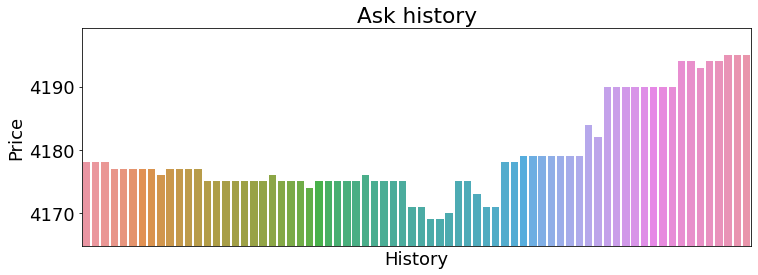

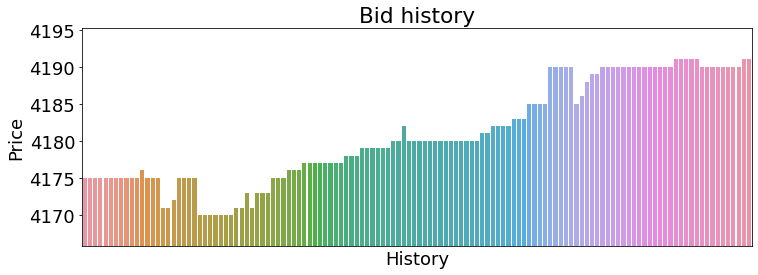

In [85]:
plt.figure(figsize=(12,4))
seaborn.barplot(
    x=np.arange(len(ask_price_list)), y=ask_price_list,
    
)
y_min, y_max = min(ask_price_list)*0.999, max(ask_price_list)*1.001
plt.ylim(y_min, y_max)
plt.xticks([])
plt.ylabel('Price')
plt.xlabel('History')
plt.title('Ask history')
plt.show()

plt.figure(figsize=(12,4))
seaborn.barplot(
    x=np.arange(len(bid_price_list)), y=bid_price_list,
)
y_min, y_max = min(bid_price_list)*0.999, max(bid_price_list)*1.001
plt.ylim(y_min, y_max)
plt.xticks([])
plt.ylabel('Price')
plt.xlabel('History')
plt.title('Bid history')
plt.show()